In [1]:
# GENERATING THE DATA FOR CSV FILES
import numpy as np
from random import random
from random import shuffle
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
# Generates a list containing n-number of factors

#seed for consistent results
np.random.seed(0)

#creates the column headers for the factors
def populate_factors(n):
    s = 'Factor '
    f = [s+str(i) for i in range(1,n+1)]
    return f

# Randomly generates a list of sigma values (std deviations) corresponding to the number of factors between [0.1,0.3] 
def get_std_devs(factors):
    std_devs = []
    for i in factors:
        
        # Sampling from adding a normal and a uniform distribution to get the standard deviations for each factor
        # the sum of the normal and uniform was done to sample from a distribution that is uniform-like but has
        # potential for extreme values
        v = np.random.normal(0,.05,1) + np.random.uniform(0.1,0.25,1)
        std_devs.append(v)
    return std_devs

# This iterates over the factors to build covariance between factors as is seen in real-market factors
# Factors are are covariant with varrying numbers of other factors
def addCov(facts):
    df = pd.DataFrame(pct_changes).transpose()
    num_facts = len(facts)
    count = 0
    
    #this will be the list of shuffled indices so factors' covariances are not calculated in order
    indices = [i for i in range(0, num_facts)]
    shuffle(indices)
    
    #iterates over the factors adding covariance
    for j in indices:
        #chooses the number of factors to be covariant to
        num_cov = (int)((max(min(np.random.poisson(5,1) + np.random.normal(5, 10, 1),  num_facts -1), 0)) )
        if num_cov > 0:
            covs = (np.random.uniform(1,num_facts,num_cov))
            covs = [(int)(i) for i in covs]
#             print("Factor number " + str(j) + " is covariant with:\t" + str(covs))
            weight = 1 / num_cov

            #creates the covariance component of the series
            temp = df.iloc[:, j].copy()
            df.iloc[:, j] = df.iloc[:,j] * 0
            for i in covs:
                df.iloc[:, j] = df.iloc[:,j] + df.iloc[:,i] * weight

            df.iloc[:, j] = df.iloc[:,j] * 3 + temp
        count += 1


    return list(df.transpose().values)
    
    
        
    
# Samples from a normal distribution n-times to get the pct change for n-number of data points using the sigma values generated
def get_pct_changes(n,std_devs):
    p = []
    for dev in std_devs:
        # s is a list, so pct changes is a list of lists
        s = list(np.random.normal(0,dev,n))
        p.append(s)
        
    
    return p


# Calculates the returns on index based on time-units
def get_returns(pct_changes,numDataPoints):
    rets = []

    num_returns = numDataPoints
    i = 0
    tmp = 0
    factor_number = 0;
    while(i!=num_returns):
        summing = 0
        factor_number = 0
        for factor_change in pct_changes:
            factor_number+=1
            
            #each factor has slightly more influence on the returns
            tmp = max( 5*factor_number - 200,0 )
            
            #the weight of each factor is sampled from a uniform distribution
            w = np.random.uniform(0.1*tmp,1.4*tmp)
            
            #adds the weighted factor component
            summing+=w*factor_change[i]

        rets.append(summing)
        i+=1
    return rets



def add_jumps(pcts):
    
    for i in range(1,numFactors):
        pcts[i] += np.random.poisson(.1, numDataPoints) * np.random.normal(0, .1, numDataPoints)
        
    return pcts
        

numFactors=100
numDataPoints = 1000


factors = populate_factors(numFactors)
std_devs = get_std_devs(factors)
pct_changes = get_pct_changes(numDataPoints,std_devs)
pct_changes2 = addCov(pct_changes)
pct_changes2 = add_jumps(pct_changes2)
returns = get_returns(pct_changes2,numDataPoints)





print(max(returns))
print(min(returns))
print(sum(returns)/len(returns))



3941.2655789726587
-4374.423622414166
7.765318821800505


In [2]:
np.random.poisson(5,100) + np.random.normal(5, 10, 100)

array([  7.67778583,  17.58831229,  12.39393472,   6.11836509,
        14.28207712,  14.76563996,   1.14917373,  20.28947744,
        19.61768077,  10.7640397 ,  20.61719054,   4.90492465,
        22.20106258,  16.09845891,  22.24632552,   4.37230918,
        10.75680083,   4.0885525 ,   3.23757762,  -4.49184088,
         6.07991216,  15.24455987,   0.92986968,  21.10586645,
        19.75407648,  14.65599027,  -5.69044799,   3.27064463,
        20.22276137,   5.5862134 ,  -3.21302527,   9.80356761,
         8.93794365,   6.27022529,  12.48627838,  13.13908943,
        -3.11643038,   9.09026672,   4.14852774,  12.44450169,
        16.33389507,   7.74294302,   7.93863997, -20.42171077,
         4.75550119,  12.03335785,  23.29827833,  -5.90728609,
       -13.84982813,  24.66534061,   5.43250071,  13.39918661,
         6.70361252,  16.3243881 ,   8.54308855,  10.80040767,
        14.21097453,  17.49090613,   9.72468024,  -0.65085889,
        11.23591818,   4.80899521,  16.516576  ,   2.82

In [3]:
df = pd.DataFrame(pct_changes2).transpose()

In [6]:
# df.to_csv("/Users/christiancolomb/Desktop/Optimization-Factor-Selection-Project-master/percent_changes.csv")
df.to_csv("./percent_changes.csv")

In [7]:
df2 = pd.DataFrame(returns)

In [8]:

df2.to_csv("./returns.csv")

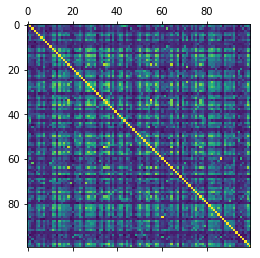

In [9]:
plt.matshow(df.corr())

In [10]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.110797,-0.022509,-0.016543,0.194194,0.340834,0.016036,0.155363,0.060744,0.016583,...,0.331988,0.292775,0.346786,0.062209,0.364697,-0.001617,-0.011381,0.071334,0.342228,0.263487
1,0.110797,1.000000,0.005299,0.217996,0.096262,0.286755,0.335694,0.331258,-0.028553,0.031200,...,0.181650,0.081004,0.270443,0.069253,-0.075585,0.229699,-0.002974,0.351170,0.484127,0.171049
2,-0.022509,0.005299,1.000000,-0.016488,0.052955,0.168950,0.008831,0.093844,0.001496,0.013283,...,-0.009141,-0.013652,0.199215,-0.041459,-0.032216,0.001781,0.314636,-0.029512,0.111631,0.239755
3,-0.016543,0.217996,-0.016488,1.000000,0.076093,0.041921,0.014706,0.200219,-0.086764,-0.001924,...,0.001997,-0.005967,0.062160,-0.046362,0.017714,-0.030798,-0.018439,0.160781,0.039338,0.013873
4,0.194194,0.096262,0.052955,0.076093,1.000000,0.193941,0.056189,0.192480,0.082856,-0.018931,...,0.221755,0.180747,0.324398,0.006713,0.044650,0.104293,0.072180,0.141043,0.352995,0.204442
5,0.340834,0.286755,0.168950,0.041921,0.193941,1.000000,0.159363,0.322177,0.086316,0.064896,...,0.436902,0.169645,0.447837,-0.018063,0.180326,0.103419,0.089699,0.095624,0.606961,0.460611
6,0.016036,0.335694,0.008831,0.014706,0.056189,0.159363,1.000000,0.487067,-0.007319,0.001763,...,0.000570,0.084573,0.312433,0.029802,-0.014102,0.037202,0.103094,0.043753,0.166144,0.029251
7,0.155363,0.331258,0.093844,0.200219,0.192480,0.322177,0.487067,1.000000,0.012710,0.039313,...,0.270769,0.204178,0.396906,-0.016756,0.093827,0.089680,0.222573,0.167803,0.438185,0.364924
8,0.060744,-0.028553,0.001496,-0.086764,0.082856,0.086316,-0.007319,0.012710,1.000000,0.012404,...,0.031466,0.022026,0.063678,0.014243,0.044222,0.032639,0.029357,-0.002752,0.120318,0.029861
9,0.016583,0.031200,0.013283,-0.001924,-0.018931,0.064896,0.001763,0.039313,0.012404,1.000000,...,0.102851,0.089374,-0.024979,0.014410,-0.009642,-0.021758,0.005521,0.085157,0.115337,0.317372
